<a href="https://colab.research.google.com/github/akhundMurad/KneeArthritisDetection/blob/development/KneeArthritisDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Knee Arthritis Detection using CNN.
This notebook represents the application of Deep Learning for detecting the level of knee arthritis by a provided X-ray.
Used technologies and methods:
- Tensorflow.
- Keras.
- Convolutional Neural Networks (CNN).
- Data Augmentation.

The process consists of the following steps:
1. Dataset preparation.
2. Building the initial model architecture.
3. Training and adjusting different architectures.
4. Comparing with the initial architecture to select the proper approach.
5. Summarizing results.

**As a result of the experiment, I tuned the model to increase validation accuracy from 35% to 82%.**


## 1. Dataset preparation.

#### 1.1. Download dataset from kaggle.

In [1]:
!kaggle datasets download -d hafiznouman786/annotated-dataset-for-knee-arthritis-detection

Dataset URL: https://www.kaggle.com/datasets/hafiznouman786/annotated-dataset-for-knee-arthritis-detection
License(s): CC0-1.0
 98% 57.0M/58.3M [00:04<00:00, 21.4MB/s]
100% 58.3M/58.3M [00:04<00:00, 14.3MB/s]


In [2]:
!unzip -qq annotated-dataset-for-knee-arthritis-detection.zip

Commands above will create a folder with the following content:

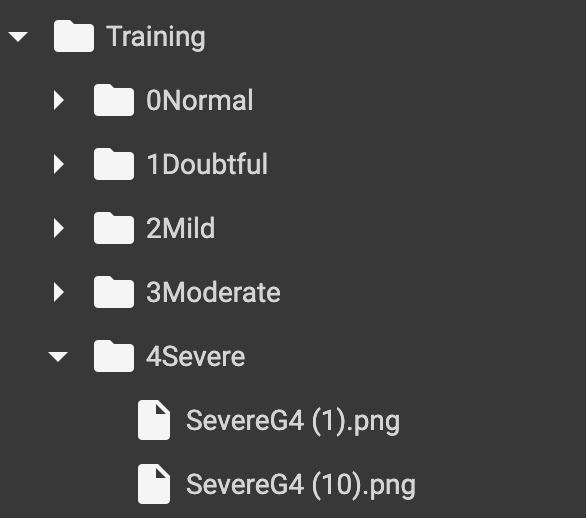

#### 1.2. Load dataset from the file system.

Found 1650 files belonging to 5 classes.
Label: 1


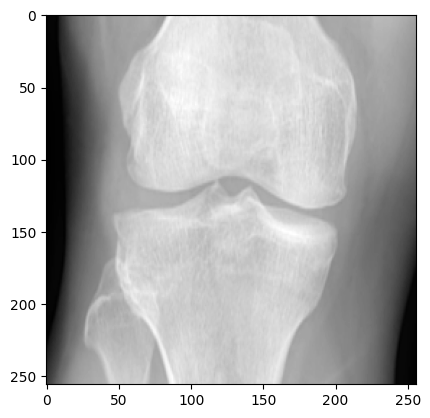

In [3]:
from tensorflow.keras.preprocessing import image_dataset_from_directory


dataset = image_dataset_from_directory(
    "Training",
    color_mode="grayscale",
    image_size=(256, 256),
    batch_size=None,
)

import matplotlib.pyplot as plt

for image, label in dataset.take(1):
    print("Label:", label.numpy().astype("uint8"))
    plt.imshow(image.numpy().astype("uint8"), cmap="gray")

#### 1.3. Split dataset.

In [4]:
from tensorflow.keras.utils import split_dataset


train_dataset, test_dataset = split_dataset(dataset, right_size=0.1)
train_dataset, val_dataset = split_dataset(train_dataset, right_size=0.1)

print("Train size:", train_dataset.cardinality().numpy())
print("Test size:", test_dataset.cardinality().numpy())
print("Validation size:", test_dataset.cardinality().numpy())

Train size: 1337
Test size: 165
Validation size: 165


## 2. Build the initial model architecture.


In [5]:
from tensorflow import keras
from tensorflow.keras import layers


inputs = keras.Input(shape=(256, 256, 1))
x = layers.Rescaling(1./255)(inputs)

x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)

x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(5, activation="softmax")(x)
model = keras.Model(inputs, outputs)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 1)]     0         
                                                                 
 rescaling (Rescaling)       (None, 256, 256, 1)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      320       
                                                                 
 conv2d_1 (Conv2D)           (None, 252, 252, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 126, 126, 32)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 124, 124, 64)      18496     
                                                             

## 3. Train the model.

#### 3.1. Compile and launch training.

In [6]:
batched_train_dataset = train_dataset.batch(32)
batched_val_dataset = val_dataset.batch(32)

model.compile(
    optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

history = model.fit(
    batched_train_dataset,
    epochs=20,
    validation_data=batched_val_dataset,
)

Epoch 1/20
42/42 [==============================] - 27s 340ms/step - loss: 1.5650 - accuracy: 0.3059 - val_loss: 1.5359 - val_accuracy: 0.3514
Epoch 2/20
42/42 [==============================] - 6s 146ms/step - loss: 1.5399 - accuracy: 0.2977 - val_loss: 1.5321 - val_accuracy: 0.3446
Epoch 3/20
42/42 [==============================] - 6s 145ms/step - loss: 1.5371 - accuracy: 0.2999 - val_loss: 1.5284 - val_accuracy: 0.3446
Epoch 4/20
42/42 [==============================] - 6s 145ms/step - loss: 1.5355 - accuracy: 0.3014 - val_loss: 1.5267 - val_accuracy: 0.3446
Epoch 5/20
42/42 [==============================] - 6s 147ms/step - loss: 1.5352 - accuracy: 0.3052 - val_loss: 1.5257 - val_accuracy: 0.3446
Epoch 6/20
42/42 [==============================] - 6s 146ms/step - loss: 1.5345 - accuracy: 0.3044 - val_loss: 1.5245 - val_accuracy: 0.3446
Epoch 7/20
42/42 [==============================] - 6s 148ms/step - loss: 1.5339 - accuracy: 0.3096 - val_loss: 1.5238 - val_accuracy: 0.3446
Epoch

In [7]:
import matplotlib.pyplot as plt


def show_plots(history):
    accuracy = history["accuracy"]
    val_accuracy = history["val_accuracy"]
    loss = history["loss"]
    val_loss = history["val_loss"]

    epochs = range(1, len(accuracy) + 1)

    plt.plot(epochs, accuracy, "bo", label="Accuracy on the training step")
    plt.plot(epochs, val_accuracy, "b", label="Accuracy on the validation step")
    plt.title("Accuracy")
    plt.legend()
    plt.figure()

    plt.plot(epochs, loss, "bo", label="Loss on the training step")
    plt.plot(epochs, val_loss, "b", label="Loss on the validation step")
    plt.title("Loss")
    plt.legend()
    plt.show()

#### 3.2. Show results.

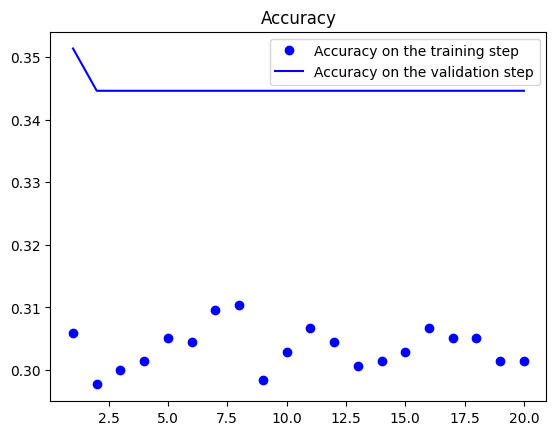

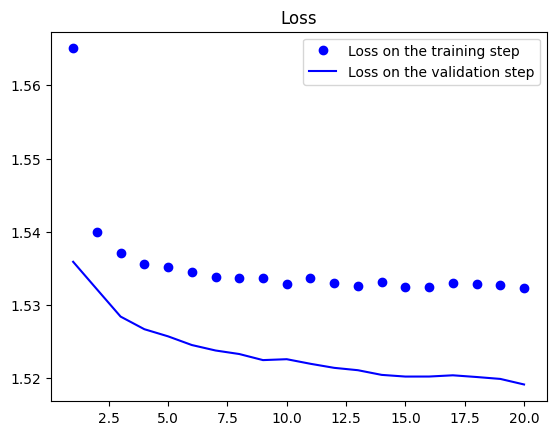

In [8]:
show_plots(history.history)

## 4. Adjust the model architecture.

#### 4.1. Applying the data augmentation.

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers


data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)


inputs = keras.Input(shape=(256, 256, 1))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)

x = layers.Conv2D(filters=8, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=16, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)

x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(5, activation="softmax")(x)
model = keras.Model(inputs, outputs)

batched_train_dataset = train_dataset.batch(32)
batched_val_dataset = val_dataset.batch(32)

model.compile(
    optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

callbacks = keras.callbacks.ModelCheckpoint(
    "best_cnn_with_data_augmentation.h5", save_best_only=True, monitor="val_accuracy"
)

history = model.fit(
    batched_train_dataset,
    epochs=100,
    validation_data=batched_val_dataset,
    callbacks=callbacks,
)

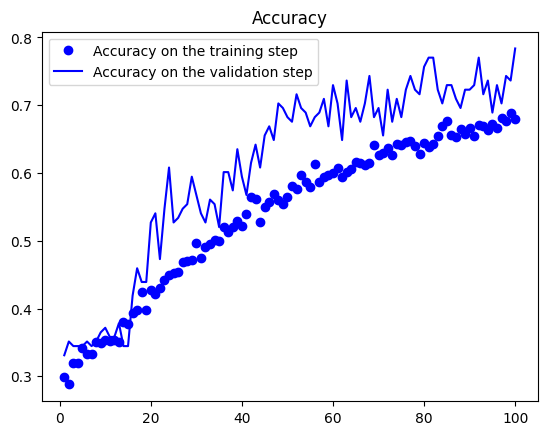

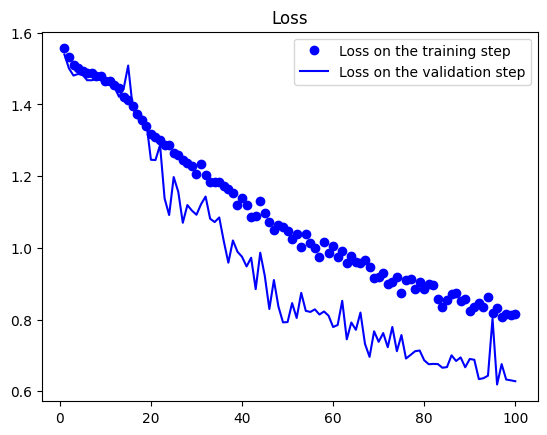

In [10]:
show_plots(history.history)

In [11]:
max(history.history["val_accuracy"])

0.7837837934494019

In [12]:
loaded_model = keras.saving.load_model("best_cnn_with_data_augmentation.h5")
loaded_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 1)]     0         
                                                                 
 sequential (Sequential)     (None, 256, 256, 1)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 256, 256, 1)       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 254, 254, 8)       80        
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 8)       0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 125, 125, 16)      1168      
                                                           

In [13]:
loaded_model.evaluate(test_dataset.batch(32))

6/6 [==============================] - 0s 43ms/step - loss: 0.9234 - accuracy: 0.6121


[0.9234174489974976, 0.6121212244033813]

#### 4.2. Add fully-connected layers.

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers


data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)


inputs = keras.Input(shape=(256, 256, 1))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)

x = layers.Conv2D(filters=8, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=16, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Flatten()(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(1024, activation="relu")(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(512, activation="relu")(x)
x = layers.Dropout(0.2)(x)

outputs = layers.Dense(5, activation="softmax")(x)
model = keras.Model(inputs, outputs)

batched_train_dataset = train_dataset.batch(16)
batched_val_dataset = val_dataset.batch(16)

model.compile(
    optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

callbacks = keras.callbacks.ModelCheckpoint(
    "best_cnn_with_data_augmentation_and_dense.h5", save_best_only=True, monitor="val_accuracy"
)

history = model.fit(
    batched_train_dataset,
    epochs=300,
    validation_data=batched_val_dataset,
    callbacks=callbacks,
)

In [19]:
max(history.history["val_accuracy"])

0.8243243098258972

In [20]:
loaded_model = keras.saving.load_model("best_cnn_with_data_augmentation_and_dense.h5")
loaded_model.evaluate(test_dataset.batch(32))

6/6 [==============================] - 0s 7ms/step - loss: 0.9424 - accuracy: 0.7515


[0.9424270391464233, 0.7515151500701904]

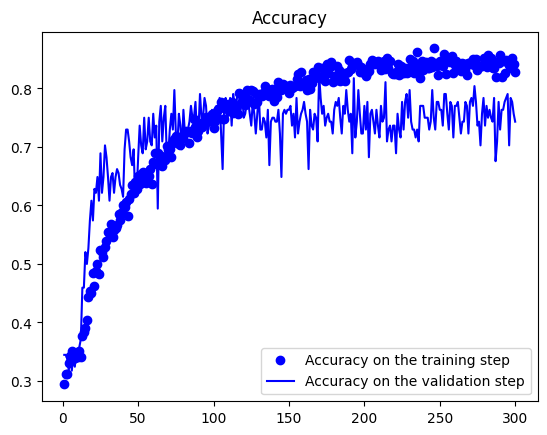

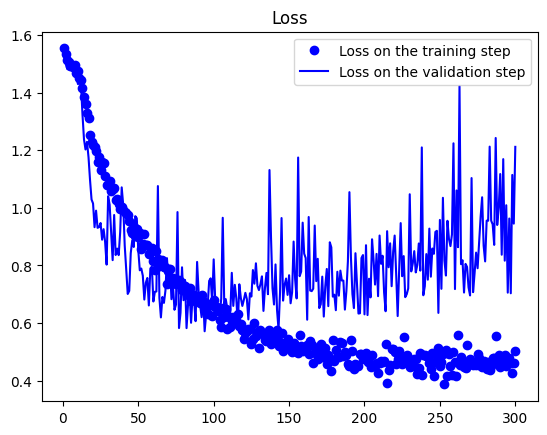

In [21]:
show_plots(history.history)

# 5. Results.

**Initial achitecture:**

- Validation accuracy: ≈35%
- Train accuracy: ≈30%

**CNN with Data Augmentation:**

- Early Epochs (1-10): Training loss decreased from 1.5560 to 1.4644, accuracy increased from 0.2992 to 0.3530.
- Mid Epochs (11-50): Training loss down to 1.0459, accuracy up to 0.5639; Validation loss 0.7929, accuracy 0.6824.
- Later Epochs (51-100): Training loss 0.8147, accuracy 0.6791; Validation loss 0.6279, accuracy 0.7838.

**CNN with Data Augmentation and Fully-Connected layers at the end:**
- Epochs 1-100: Training loss decreased from 1.5535 to 0.6259, accuracy increased from 0.2939 to 0.7562; Validation loss decreased from 1.5257 to 0.6396, accuracy increased from 0.3446 to 0.7703, with a max validation accuracy of 0.7973.
- Epochs 101-200: Training loss down to 0.4611, accuracy up to 0.8287; Validation loss fluctuated, ending at 0.7278, accuracy increased to 0.7703, with a max validation accuracy of 0.8243.
- Epochs 201-300: Training loss further decreased to 0.4279, accuracy up to 0.8527; Validation loss showed more variation, ending at 1.2118, accuracy fluctuated and ended at 0.7432, with a max validation accuracy of 0.8243.

Overall, the convolutional neural networks combined with the data augmentation and fully-connected layers have significantly developed generalization and accuracy.


# 6. References.

- Krizhevsky, A., Sutskever, I., & Hinton, G.E. (2012). ImageNet classification with deep convolutional neural networks. Communications of the ACM, 60, 84 - 90.
- Glorot, X., & Bengio, Y. (2010). Understanding the difficulty of training deep feedforward neural networks. International Conference on Artificial Intelligence and Statistics.
- Antony, J., McGuinness, K., Moran, K., & O’Connor, N.E. (2017). Automatic Detection of Knee Joints and Quantification of Knee Osteoarthritis Severity Using Convolutional Neural Networks. IAPR International Conference on Machine Learning and Data Mining in Pattern Recognition.
- Chollet, F. (2017). Deep learning with python. Manning Publications.